In [57]:
#import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
#import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
!pip install psychrochart

C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=8>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  return process_handler(cmd, _system_body)


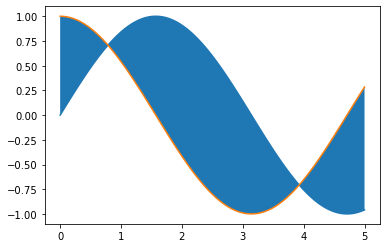

In [2]:
x = np.linspace(0, 5, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.fill_between(x, y1, y2)
plt.show()

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


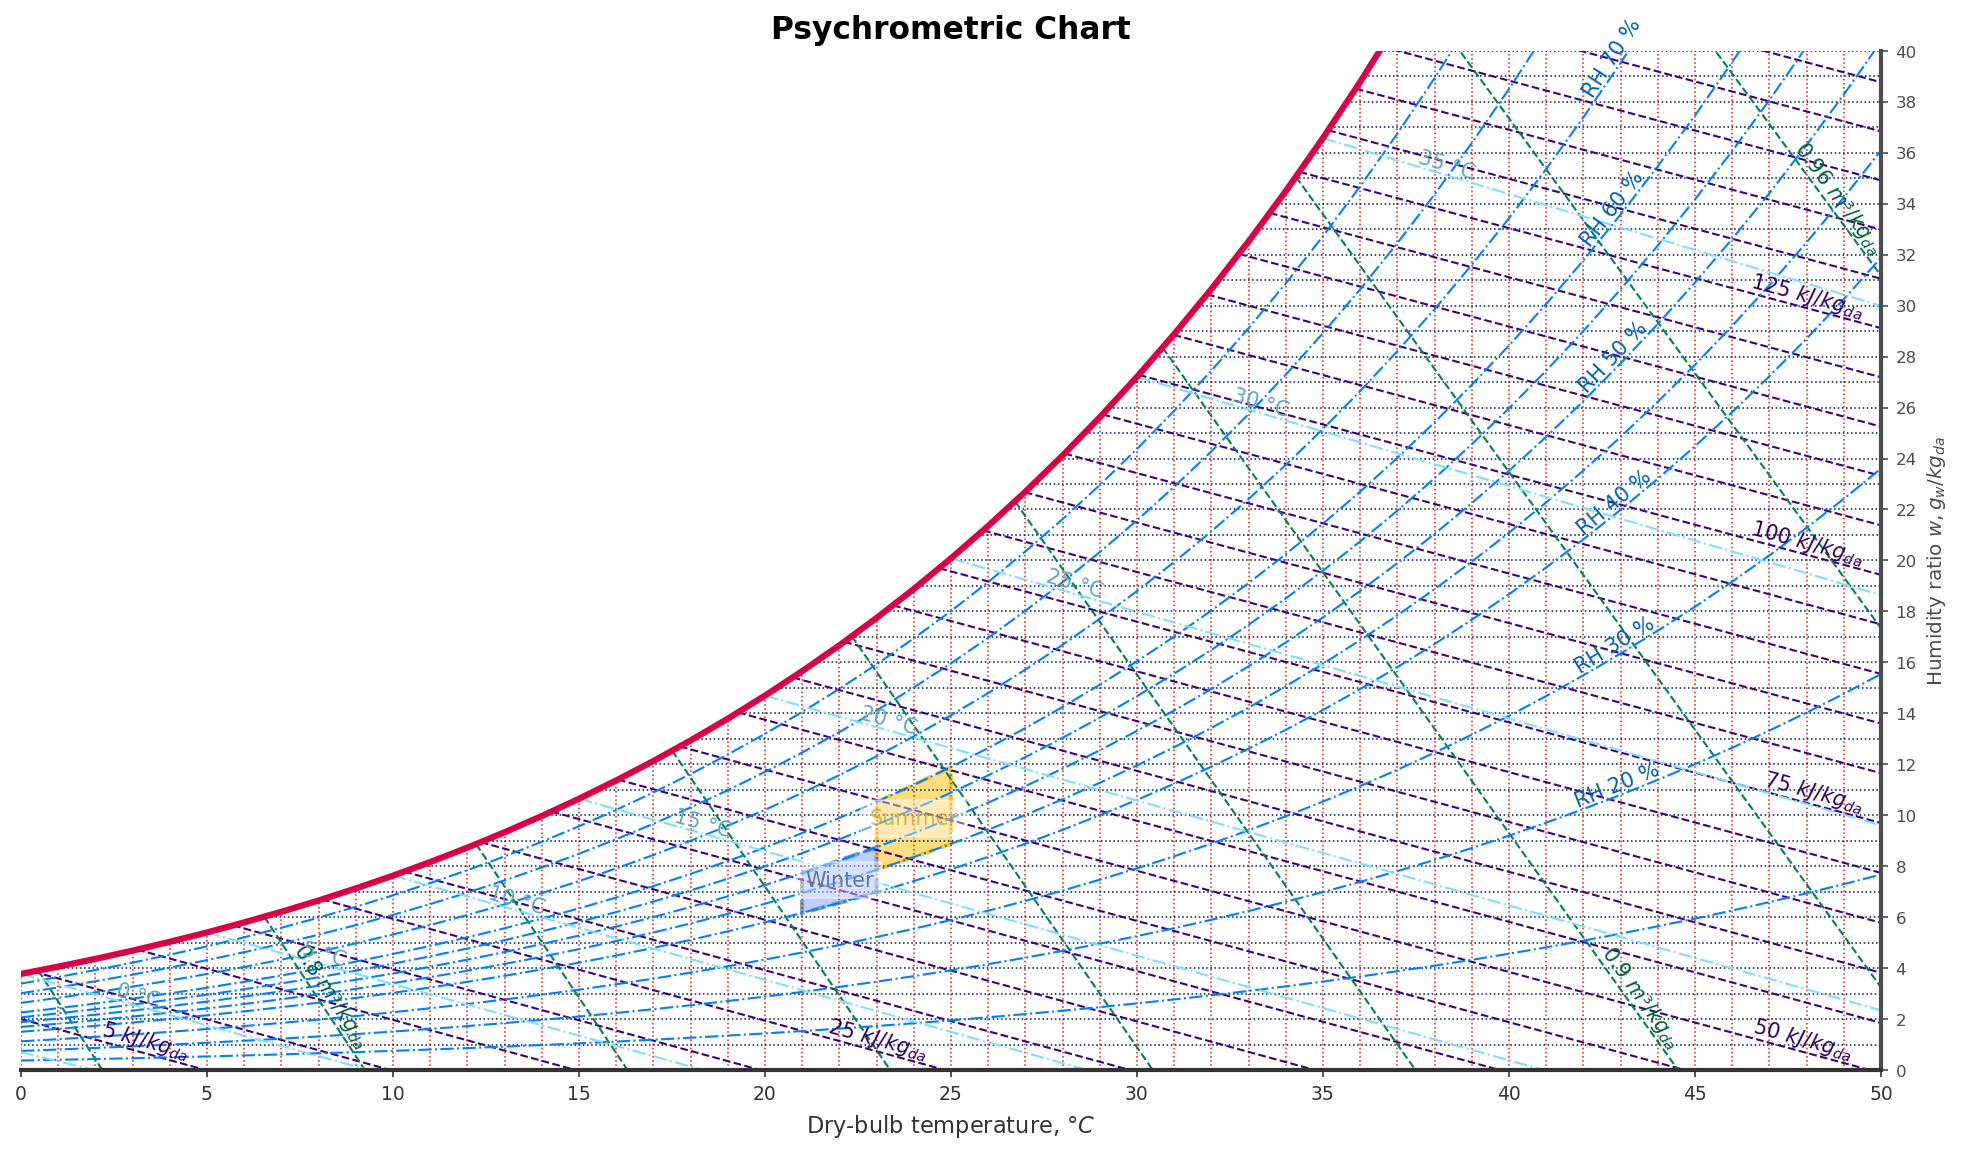

In [58]:
from psychrochart import PsychroChart

chart_default = PsychroChart('default')
ax = chart_default.plot()
ax.get_figure()

In [59]:
from pythermalcomfort.models import pmv_ppd
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic
#PMVチャート用の関数です。
#計測する乾球温度
temp=[]
for i in range(0,500,1):
    temp.append(i/10)

In [60]:
#空箱にどんどん追加させるから、その側にあったらそこに追加させるからDef文の中に入れとかないと中務が更新されない。
def PMVChart(rh,ev):
    num=[]
    pmvc=[]
    #    print (tempDict[roomId])
    #    print (humidityDict[roomId])
    tdb = temp
    tr = temp
    rh = rh   
    v = 0.05
    met = 1
    clo = 1.0
    v_r = v_relative(v=v, met=met)
    # calculate dynamic clothing
    clo_d = clo_dynamic(clo=clo, met=met)
    results = pmv(tdb=tdb, tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d, limit_inputs=False)
    pmvc.append(results) 
    a=np.abs(pmvc)<=ev
    a=np.where(a==True)[1]
    a=a.tolist()
    num.append(temp[min(a)])
    num.append(temp[max(a)])
    return num

In [96]:
from pythermalcomfort.models import set_tmp
def SETChart(rh,w):
    num=[]
    setc=[]
    #    print (tempDict[roomId])
    #    print (humidityDict[roomId])
    tdb = temp
    tr = temp
    rh = rh   
    v = 0.05
    met = 1
    clo = 0.6
    v_r = v_relative(v=v, met=met)
    # calculate dynamic clothing
    #clo_d = clo_dynamic(clo=clo, met=met)
    results=set_tmp(tdb=tdb, tr=tr, v=v_r, rh=rh, met=met, clo=clo,limit_inputs=False)
    setc.append(results)
    a=np.array(setc)
    if w == "win":
        a=np.where((a<=23.5)&(a>20))[1]
    else:
        a=np.where((a<=26)&(a>23))[1]
    a=a.tolist()
    num.append(temp[min(a)])   
    num.append(temp[max(a)])
    return num

In [68]:
from psychrochart import PsychroChart
from psychrochart import load_config
from psychrochart import load_zones
!pip install matplotlib
#chart_default = PsychroChart('default')
config_style = load_config('default')
#ゾーンを算出する
config_zone = load_zones()
#矢印のプロット
points_pair =  {
                'wedgea2': {'label': 'wedgeA2',
                       'style': {'color': [0.0, 1.0, 0.0],"arrowstyle": "-"},
                       'xy': [(18, 95), (10, 60)]}
                }
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_arrows_dbt_rh(points_pair)
ax.get_figure()

SyntaxError: invalid syntax (Temp/ipykernel_25940/1337478789.py, line 36)

C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=8>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.su

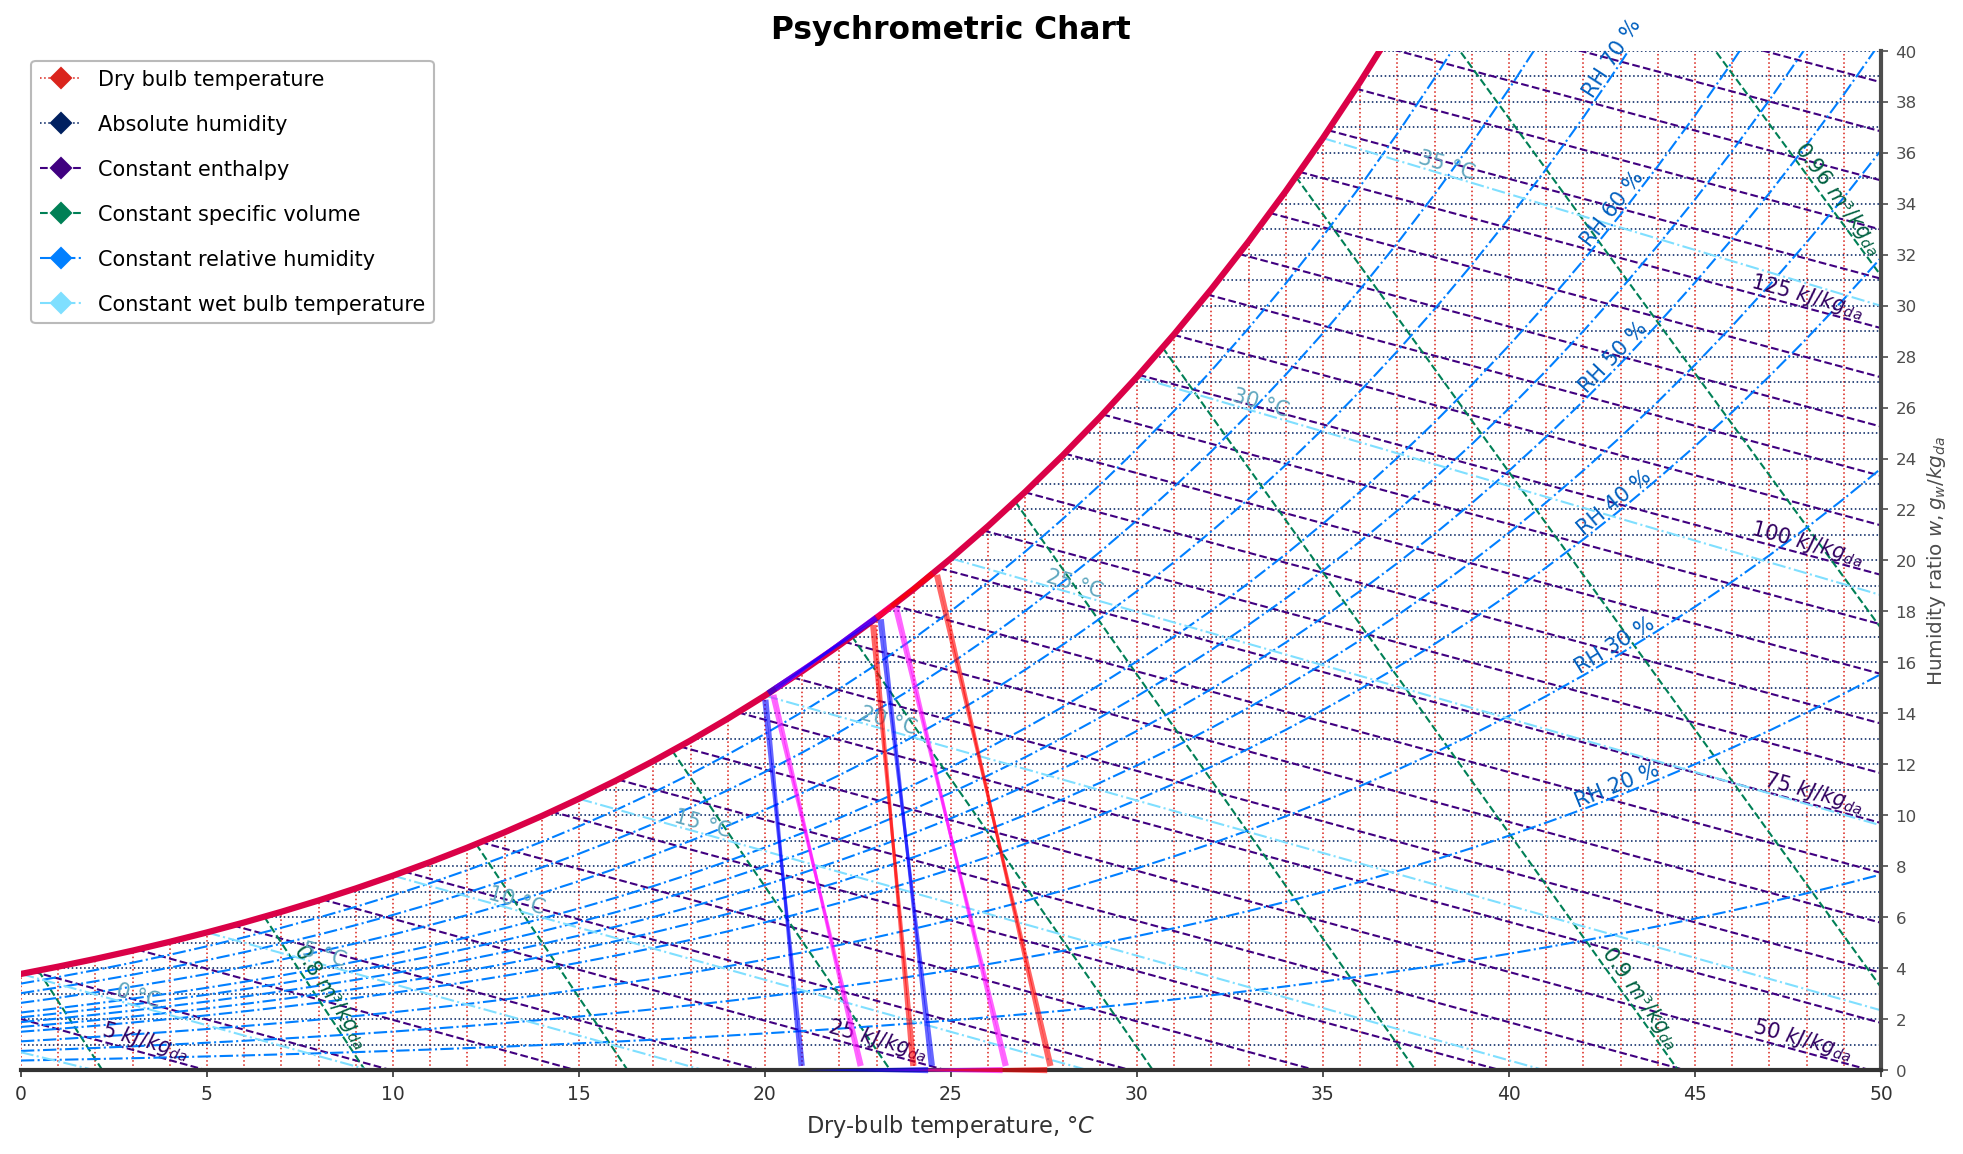

In [113]:
from psychrochart import PsychroChart
from psychrochart import load_config
from psychrochart import load_zones
!pip install matplotlib
chart_default = PsychroChart('default')
config_style = load_config('default')
#ゾーンを算出する
config_zone = load_zones()
config_zone['zones'].pop()
#四角のプロット_PMV,SET*について
points_pair = {}
#PMVについて
points_pair = pla((PMVChart(0,0.5)[0],0),(PMVChart(0,0.5)[1],0),(PMVChart(100,0.5)[0],100),(PMVChart(100,0.5)[1],100),[1.0, .0, 1.0])
#SETについて
points_pair = points_pair | pla((SETChart(0,"win")[0],0),(SETChart(0,"win")[1],0),(SETChart(100,"win")[0],100),(SETChart(100,"win")[1],100),[0, 0, 1.0])
points_pair = points_pair | pla((SETChart(0,"sum")[0],0),(SETChart(0,"sum")[1],0),(SETChart(100,"sum")[0],100),(SETChart(100,"sum")[1],100),[1.0, 0, 0])
#
ax = chart.plot()
chart.plot_arrows_dbt_rh(points_pair)
#legendバーをつけるが矢印には適応することが出来ない。
chart.plot_legend(markerscale=.7, frameon=True, fontsize=10, labelspacing=1.2)
ax.get_figure()

In [100]:
(SETChart(0,"sum")[0],0),(SETChart(0,"sum")[1],0),(SETChart(100,"sum")[0],100),(SETChart(100,"sum")[1],100)

((21.0, 0), (24.5, 0), (20.0, 0), (23.1, 0))

In [93]:
def pla(A,B,C,D,E):
#pla((PMVChart(0,0.5)[0],0),(PMVChart(0,0.5)[1],0),(PMVChart(100,0.5)[0],100),(PMVChart(100,0.5)[1],100),[0.0, 0.0, 0.0])
    a1={}
    a= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [A,C]}
    b= {'label': 'wedgeA2','style': {'color':E,"arrowstyle": "-"},'xy': [C,A]}
    c= {'label': 'wedgeA3','style': {'color':E,"arrowstyle": "-"},'xy': [B,D]}
    d= {'label': 'wedgeA4','style': {'color':E,"arrowstyle": "-"},'xy': [D,B]}
    e= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [C,A]}
    f= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [B,A]}
    g= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [C,D]}
    h= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [D,C]}
    #要素を追加
    a1[str(A)+str(C)]=a
    a1[str(C)+str(A)]=b
    a1[str(B)+str(D)]=c
    a1[str(D)+str(B)]=d
    a1[str(C)+str(A)]=e
    a1[str(B)+str(A)]=f
    a1[str(C)+str(D)]=g
    a1[str(D)+str(C)]=h
    return a1

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


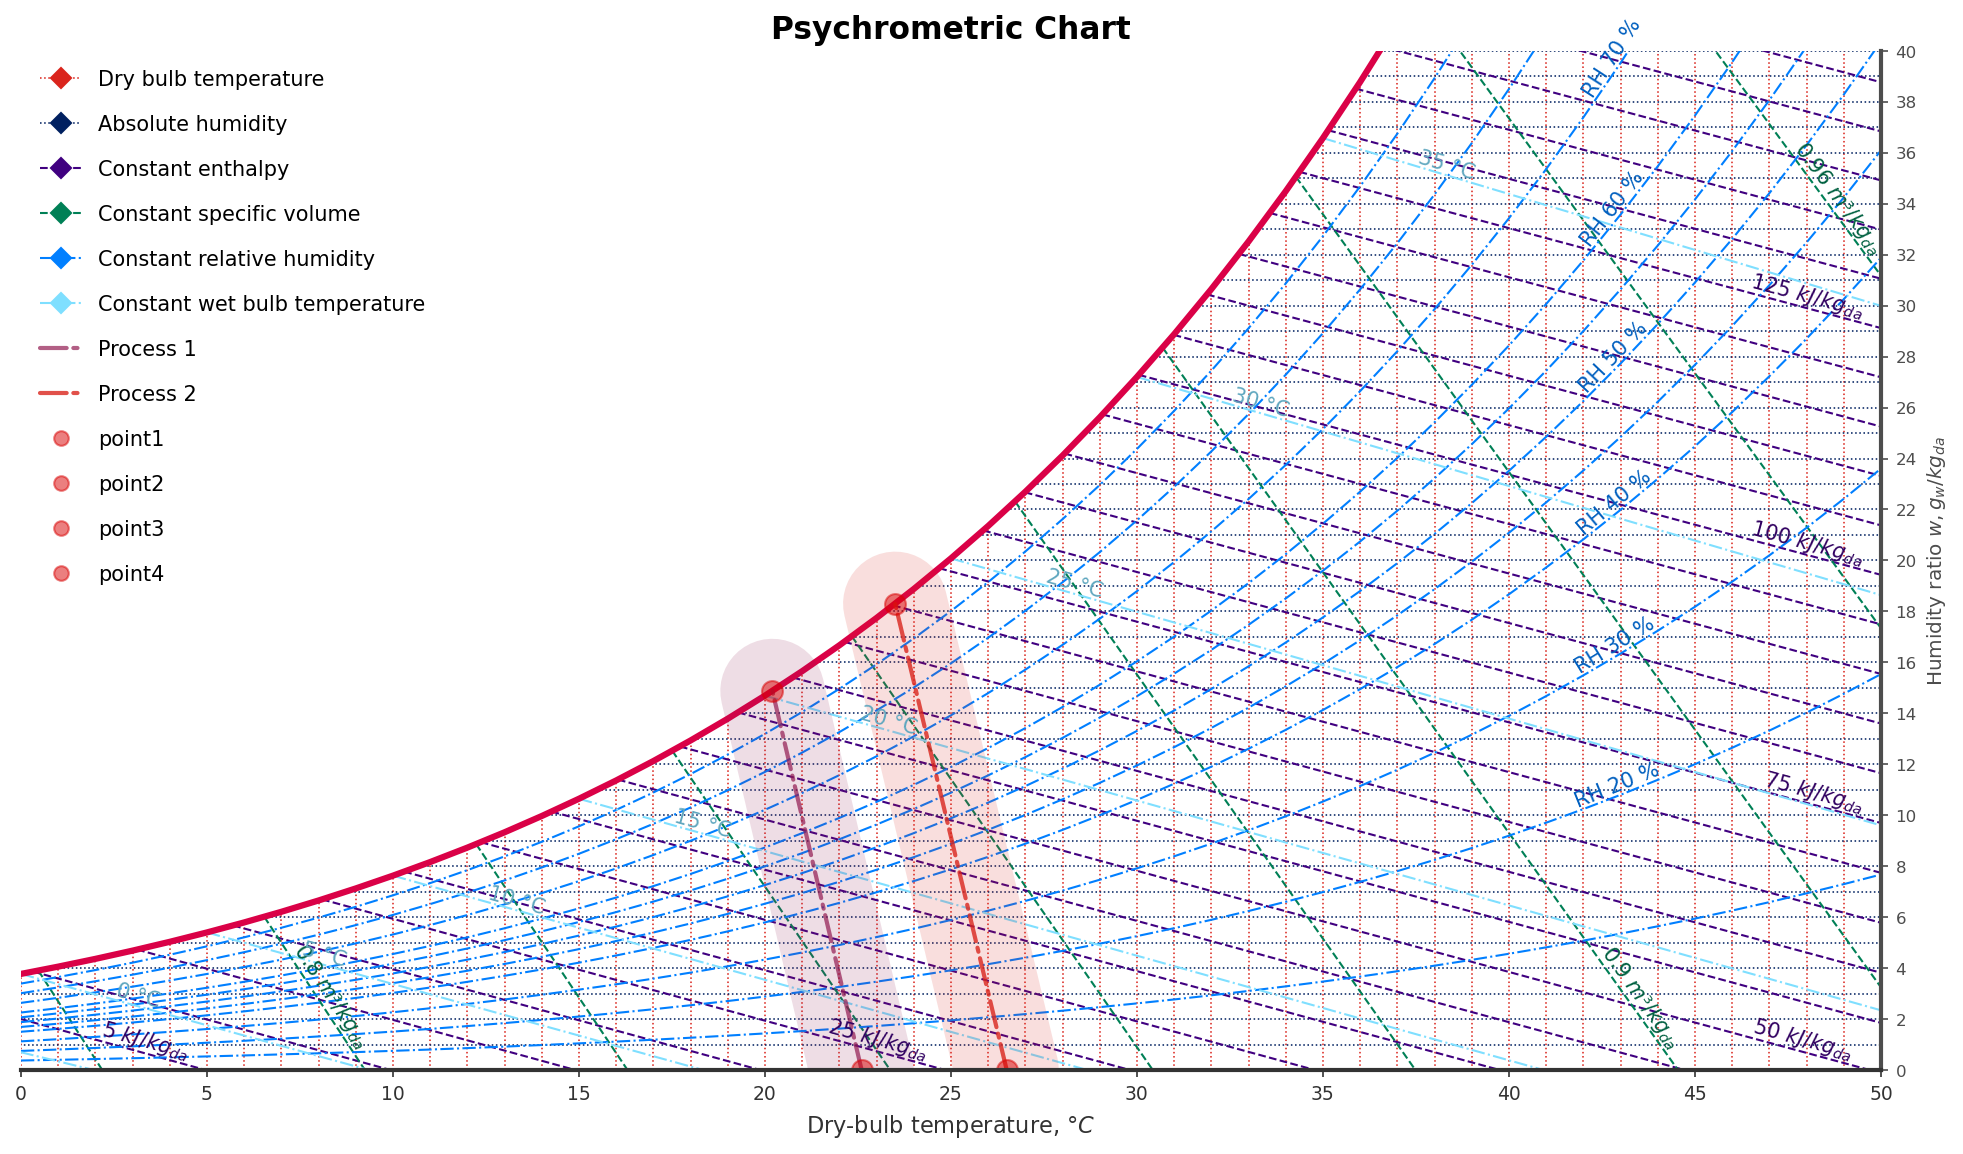

In [110]:
from psychrochart import PsychroChart
from psychrochart import load_zones
chart_default = PsychroChart('default')
from psychrochart import load_config
import matplotlib.pyplot as plt
config_style = load_config('default')
#plotする
#領域の情報の公開
config_zone = load_zones()
# 末尾にデータを追加
#config_zone['zones'].append(config_zone['zones'][0].copy())

config_zone['zones'].pop() # リストの末尾のデータを削除
config_zone['zones'].pop()
#追加したデータの設定01(今後はこれを増やす予定)
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (PMVChart(0,0.5)[0], 0)},
         'point2': {'label': 'point2',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (PMVChart(0,0.5)[1], 0)},
         'point3': {'label': 'point3',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (PMVChart(100,0.5)[0], 100)},
         'point4': {'label': 'point4',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (PMVChart(100,0.5)[1], 100)}}

connectors = [{'start': 'point1',
               'end': 'point3',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'point2',
               'end': 'point4',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 0.8],
                         "linewidth": 2, "linestyle": "-."}}]
#ここでチャートの描画
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
##ボアボアの線を引きたかったらこれを使ってね
chart.plot_points_dbt_rh(point, connectors)
#legendバーをつける
chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
ax.get_figure()

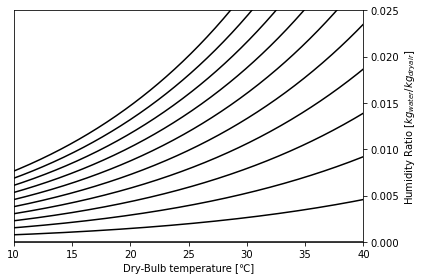

In [90]:
#Youotube from Matplotlib
import psychrolib
import matplotlib.pyplot as plt
import numpy as np

psychrolib.SetUnitSystem(psychrolib.SI)

pressure = 101325

t_array = np.arange(5,45,0.1)
rh_array = np.arange(0,1.1,0.1)
enthalpy_array = np.arange(0,120000,10000)
hr_hor_lines = np.arange(0.005,0.03,0.005)
twb_array = np.arange(-10,45,5)
#箱を生成
f,ax = plt.subplots()
#全体像を生成する。(0℃から45℃の相対湿度の線)
for rh in rh_array:
    rh_array = []
    for t in t_array:
        hr = psychrolib.GetHumRatioFromRelHum(t,rh,pressure)
        rh_array.append(hr)
    ax.plot(t_array,rh_array,"k")
#全体像を生成する。(0℃から45℃の湿球温度の線)
for twb in twb_array:
    hr_array = []
    t_plot_array = []
    for t in t_array:
        if twb <= t:
            #print(twb,t)
            hr = psychrolib.GetHumRatioFromTWetBulb(t,twb,pressure)
            hr_array.append(hr)
            t_plot_array.append(t)
#    ax.plot(t_plot_array,hr_array,"b")
#タイトル等を表示(見せる領域も変化させることが出来る)
ax.set(ylim=(0,0.025),xlim=(10,40),ylabel="Humidity Ratio [$kg_{water}/kg_{dry air}$]",xlabel="Dry-Bulb temperature [℃]")
#ここで向きを変更することが出来る。
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()